In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('podatoci.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,idosebe,DatumObdobja,StarostLeta,MeseciBrezpos,MeseciDelDobe,IDSpola,OEN,IDklasiusSRV,...,IDizpisaBO,IDVpisaBO,IdIndikatorPrometa,ePrijava,IDStanjaZN,IDZaposljivosti,IzdelanZN,Razvrstitev ZRSZ,truncated,duration
0,35,35,80578,2019-10-31,35,5,27,2,702,42,...,69,8,4,N,4,2,1,E,0,167
1,63,63,80587,2019-04-30,44,0,96,1,401,21,...,104,8,4,N,0,0,0,O,0,0
2,77,77,80588,2019-11-30,37,0,131,2,502,25,...,69,8,4,N,4,2,1,E,0,27
3,210,210,80692,2019-10-31,35,2,71,1,401,42,...,68,8,4,N,4,1,1,E,0,87
4,464,464,80898,2019-09-30,36,0,55,2,401,42,...,69,8,4,N,4,1,1,E,0,8


In [3]:
df = df.drop(["Unnamed: 0","Unnamed: 0.1","truncated"], axis=1)

In [5]:
df.head()

,idosebe,DatumObdobja,StarostLeta,MeseciBrezpos,MeseciDelDobe,IDSpola,OEN,IDklasiusSRV,IDKlasiusP,IDKlasiusProgram,...,DatumIzpisaBO,IDizpisaBO,IDVpisaBO,IdIndikatorPrometa,ePrijava,IDStanjaZN,IDZaposljivosti,IzdelanZN,Razvrstitev ZRSZ,duration
0,80578,2019-10-31,35,5,27,2,702,42,751,1025,...,2019-09-30,69,8,4,N,4,2,1,E,167
1,80587,2019-04-30,44,0,96,1,401,21,772,121,...,2019-02-13,104,8,4,N,0,0,0,O,0
2,80588,2019-11-30,37,0,131,2,502,25,626,49,...,2019-11-17,69,8,4,N,4,2,1,E,27
3,80692,2019-10-31,35,2,71,1,401,42,770,159,...,2019-10-24,68,8,4,N,4,1,1,E,87
4,80898,2019-09-30,36,0,55,2,401,42,616,669,...,2019-08-31,69,8,4,N,4,1,1,E,8


In [4]:
import seaborn as sns
# pear_corr=df.corr(method='pearson')
# from matplotlib.colors import LogNorm
# log_norm = LogNorm(vmin=pear_corr.min().min(), vmax=pear_corr.max().max())
# from matplotlib import pyplot
# pyplot.figure(figsize=(15, 15)) # width and height in inches
# sns.heatmap(pear_corr,
#             xticklabels=pear_corr.columns,
#             yticklabels=pear_corr.columns,
#             cmap='RdBu_r',
#             annot=False,
#             linewidth=0.5,
#            )

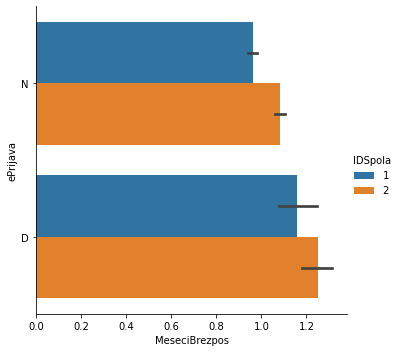

In [7]:
sns.catplot(x="MeseciBrezpos", y="ePrijava", hue="IDSpola", kind="bar",
data=df)

In [8]:
df1=df.where(df['Razvrstitev ZRSZ'] == 'E').dropna()
len(df1)

29750

In [9]:
df2=df.where((df['Razvrstitev ZRSZ'] == 'E') & (df['IDSpola']==2)).dropna()
len(df2)

15420

In [10]:
diff=len(df1)-len(df2)
diff

14330

In [11]:
df1=df.where(df['Razvrstitev ZRSZ'] == 'I').dropna()
len(df1)

1819

count    74086.000000
mean       232.796129
std        173.316043
min       -841.000000
25%         62.000000
50%        256.000000
75%        342.000000
max        609.000000
Name: duration, dtype: float64


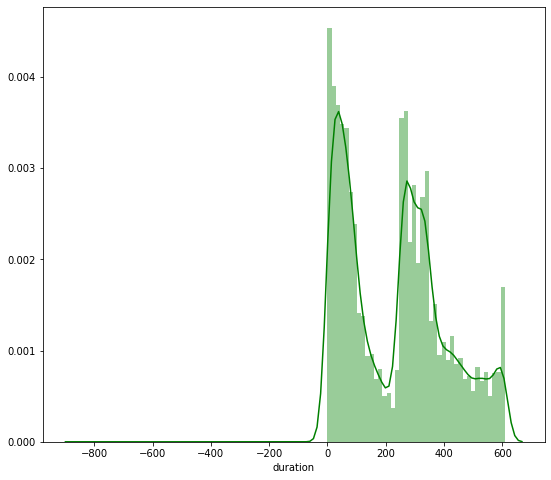

In [12]:
import matplotlib.pyplot as plt
print(df['duration'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['duration'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [13]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [8]:
# df_num = df.select_dtypes(include = ['float64', 'int64'])
# df_num.head()
df_num=df

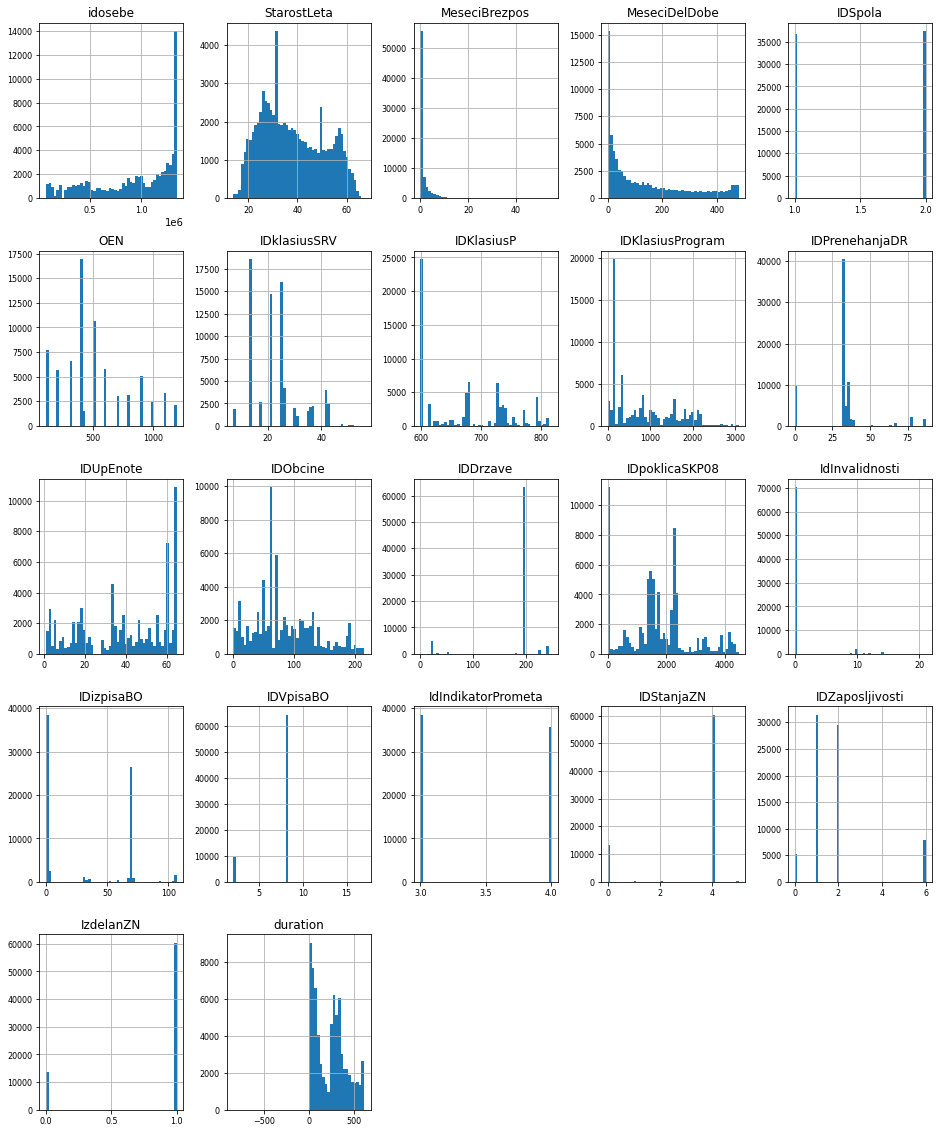

In [7]:
df_nums=df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [16]:
df_num_corr = df_num.corr()['duration'][:-1] # -1 because the latest row is duration
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There are {} strongly correlated values with duration:\n{}".format(len(golden_features_list), golden_features_list))

There are 6 strongly correlated values with duration:
IDZaposljivosti       0.235769
StarostLeta           0.163124
MeseciDelDobe         0.147885
MeseciBrezpos        -0.274301
IDizpisaBO           -0.802670
IdIndikatorPrometa   -0.855893
Name: duration, dtype: float64


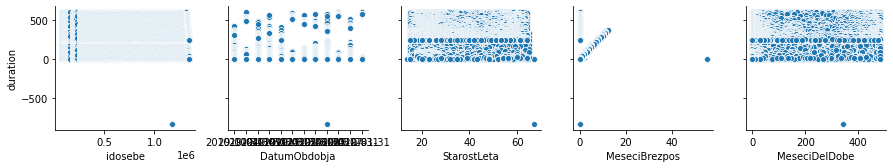

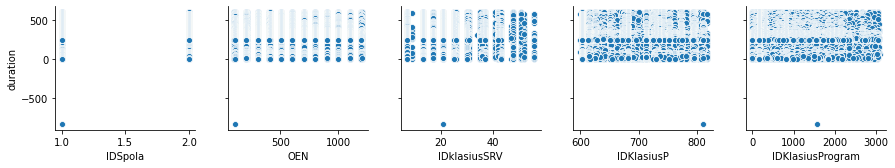

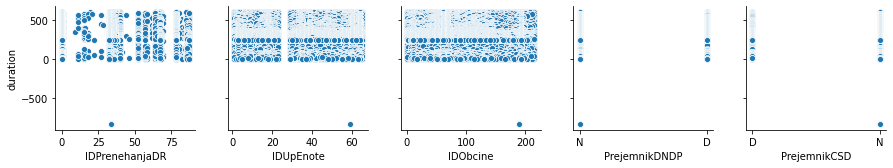

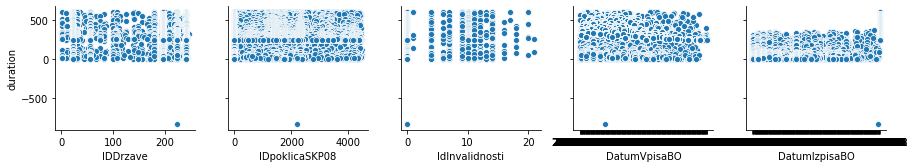

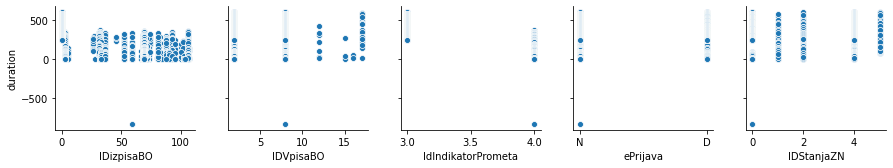

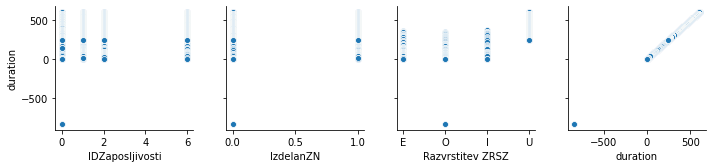

In [10]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['duration'])

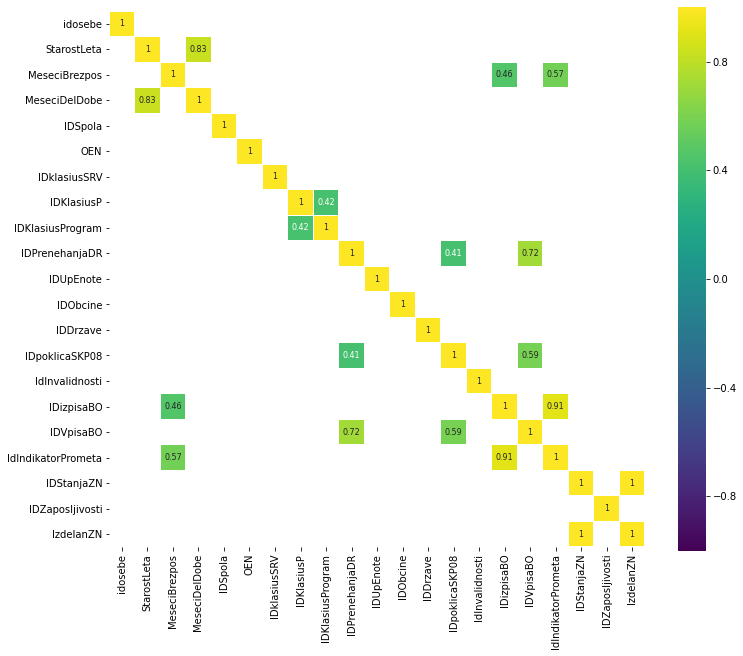

In [12]:
import matplotlib.pyplot as plt
corr = df_num.drop('duration', axis=1).corr() # We already examined duration correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [84]:
wh_leta = (df.StarostLeta > 18) & (df.StarostLeta < 64)
print(type(wh_leta))
count=0
for true in wh_leta:
    if true!=1:
        count+=1
print(count)
df

<class 'pandas.core.series.Series'>
1531


,idosebe,DatumObdobja,StarostLeta,MeseciBrezpos,MeseciDelDobe,IDSpola,OEN,IDklasiusSRV,IDKlasiusP,IDKlasiusProgram,...,DatumIzpisaBO,IDizpisaBO,IDVpisaBO,IdIndikatorPrometa,ePrijava,IDStanjaZN,IDZaposljivosti,IzdelanZN,Razvrstitev ZRSZ,duration
0,80578,2019-10-31,35,5,27,2,702,42,751,1025,...,2019-09-30,69,8,4,N,4,2,1,E,167
1,80587,2019-04-30,44,0,96,1,401,21,772,121,...,2019-02-13,104,8,4,N,0,0,0,O,0
2,80588,2019-11-30,37,0,131,2,502,25,626,49,...,2019-11-17,69,8,4,N,4,2,1,E,27
3,80692,2019-10-31,35,2,71,1,401,42,770,159,...,2019-10-24,68,8,4,N,4,1,1,E,87
4,80898,2019-09-30,36,0,55,2,401,42,616,669,...,2019-08-31,69,8,4,N,4,1,1,E,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74081,1341365,2019-12-31,55,0,420,1,411,13,603,161,...,2020-09-01,0,8,3,N,0,2,0,U,245
74082,1341368,2019-12-31,23,0,0,1,506,13,603,161,...,2020-09-01,0,2,3,N,0,1,0,U,245
74083,1341369,2019-12-31,20,0,25,1,402,13,603,161,...,2020-09-01,0,8,3,N,0,1,0,U,245
74084,1341371,2019-12-31,53,0,381,1,105,13,603,161,...,2020-09-01,0,8,3,N,0,1,0,U,245


In [34]:
exited=df.where(df['Razvrstitev ZRSZ'] == 'E').dropna()
exited

,idosebe,DatumObdobja,StarostLeta,MeseciBrezpos,MeseciDelDobe,IDSpola,OEN,IDklasiusSRV,IDKlasiusP,IDKlasiusProgram,...,DatumIzpisaBO,IDizpisaBO,IDVpisaBO,IdIndikatorPrometa,ePrijava,IDStanjaZN,IDZaposljivosti,IzdelanZN,Razvrstitev ZRSZ,duration
0,80578.0,2019-10-31,35.0,5.0,27.0,2.0,702.0,42.0,751.0,1025.0,...,2019-09-30,69.0,8.0,4.0,N,4.0,2.0,1.0,E,167.0
2,80588.0,2019-11-30,37.0,0.0,131.0,2.0,502.0,25.0,626.0,49.0,...,2019-11-17,69.0,8.0,4.0,N,4.0,2.0,1.0,E,27.0
3,80692.0,2019-10-31,35.0,2.0,71.0,1.0,401.0,42.0,770.0,159.0,...,2019-10-24,68.0,8.0,4.0,N,4.0,1.0,1.0,E,87.0
4,80898.0,2019-09-30,36.0,0.0,55.0,2.0,401.0,42.0,616.0,669.0,...,2019-08-31,69.0,8.0,4.0,N,4.0,1.0,1.0,E,8.0
5,80909.0,2019-12-31,38.0,1.0,39.0,1.0,401.0,21.0,735.0,1219.0,...,2019-11-17,69.0,8.0,4.0,N,4.0,2.0,1.0,E,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35618,1339733.0,2019-12-31,28.0,0.0,11.0,1.0,302.0,13.0,603.0,161.0,...,2019-12-14,69.0,8.0,4.0,N,0.0,0.0,0.0,E,5.0
35619,1339810.0,2019-12-31,56.0,0.0,11.0,1.0,203.0,13.0,603.0,0.0,...,2019-12-23,69.0,8.0,4.0,N,0.0,0.0,0.0,E,14.0
35621,1340050.0,2019-12-31,36.0,0.0,9.0,1.0,702.0,13.0,603.0,161.0,...,2019-12-15,69.0,8.0,4.0,N,0.0,0.0,0.0,E,2.0
35624,1340317.0,2019-12-31,28.0,0.0,40.0,2.0,1204.0,13.0,603.0,161.0,...,2019-12-25,69.0,8.0,4.0,N,0.0,0.0,0.0,E,9.0


In [95]:
mean_age=exited['StarostLeta'].mean()
print(f"The average age of the participants who exited is: {np.round(mean_exited,2)}")

The average age of the participants who exited is: 37.98


In [86]:
mean_unemp=exited['MeseciBrezpos'].mean()
print(f"The average months of unemployment of the participants who exited is: {np.round(mean_unemp,2)}")

The average months of unemployment of the participants who exited is: 1.96


In [89]:
most_freq_klasius=exited['IDklasiusSRV'].mode()
print(most_freq_klasius)
count=0
for klasius in exited['IDklasiusSRV']:
    if(klasius==25):
        count+=1
print(count)

0    25.0
dtype: float64
6748


In [83]:
# print(exited['IDSpola'].count())
# m=0
# w=0
# for human in exited['IDSpola']:
#     if(human==1):
#         m+=1
#     elif(human==2):
#         w+=1
# print(w, m)

29750
15420 14330


In [94]:
m, w=exited["IDSpola"].value_counts()
print(m, w)

15420 14330


In [101]:
klasius_counter=exited['IDKlasiusP'].value_counts()
print(klasius_counter)

603.0    8538
681.0    2339
729.0    1640
675.0    1382
795.0    1214
         ... 
716.0       1
806.0       1
628.0       1
724.0       1
781.0       1
Name: IDKlasiusP, Length: 91, dtype: int64


In [102]:
klasius_counter=exited['IDklasiusSRV'].value_counts()
print(klasius_counter)

25.0    6748
13.0    6613
21.0    5999
42.0    1963
26.0    1543
43.0    1369
17.0    1039
36.0     979
37.0     914
30.0     895
35.0     747
7.0      371
31.0     360
48.0      94
51.0      42
52.0      31
41.0      17
56.0      16
9.0        8
47.0       2
Name: IDklasiusSRV, dtype: int64


In [121]:
klasius_counter=exited['IDKlasiusProgram'].value_counts()
print(klasius_counter)
print(np.round(max(klasius_counter)/len(exited['IDKlasiusProgram'])*100,2),"%")

161.0     6344
309.0     1622
814.0     1179
1547.0     925
0.0        656
          ... 
1315.0       1
1710.0       1
2658.0       1
757.0        1
2790.0       1
Name: IDKlasiusProgram, Length: 1379, dtype: int64
21.32 %


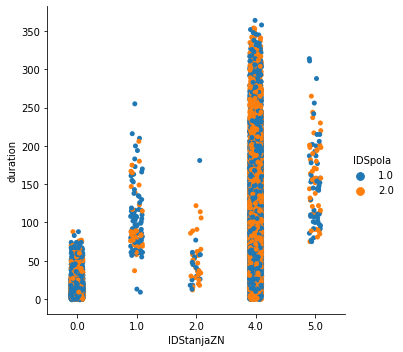

In [155]:
sns.catplot(x="IDStanjaZN", y="duration", hue="IDSpola",
data=exited)

In [148]:
max(exited.where((exited.IDStanjaZN==5)&(exited.duration>100.0))['duration'].dropna())

314.0

In [156]:
df['Razvrstitev ZRSZ'].value_counts()

U    38456
E    29750
O     4061
I     1819
Name: Razvrstitev ZRSZ, dtype: int64

In [167]:
unemployed = df.where(df['Razvrstitev ZRSZ'] == 'U').dropna()

In [164]:
most_freq_klasius=unemployed['IDklasiusSRV'].mode()
print(most_freq_klasius)
count=0
for klasius in unemployed['IDklasiusSRV']:
    if(klasius==25):
        count+=1
print(count)

0    13.0
dtype: float64
8150


In [225]:
unemployed = df.where(df['Razvrstitev ZRSZ'] == 'U').dropna()
unemployed=pd.get_dummies(unemployed, columns=["IDKlasiusP", "IDklasiusSRV", "IDKlasiusProgram", "IDPrenehanjaDR", "IDUpEnote", "IDObcine", "PrejemnikDNDP", "PrejemnikCSD", "IDpoklicaSKP08", "IdInvalidnosti", "IDizpisaBO", "IDVpisaBO", "IDStanjaZN", "IDZaposljivosti", "IzdelanZN", "IDSpola", "ePrijava"]).head()
unemployed

,idosebe,DatumObdobja,StarostLeta,MeseciBrezpos,MeseciDelDobe,OEN,IDDrzave,DatumVpisaBO,DatumIzpisaBO,IdIndikatorPrometa,...,IDZaposljivosti_0.0,IDZaposljivosti_1.0,IDZaposljivosti_2.0,IDZaposljivosti_6.0,IzdelanZN_0.0,IzdelanZN_1.0,IDSpola_1.0,IDSpola_2.0,ePrijava_D,ePrijava_N
35630,80588.0,2019-12-31,37.0,0.0,132.0,502.0,197.0,2019-12-03,2020-09-01,3.0,...,0,0,1,0,0,1,0,1,0,1
35631,80622.0,2019-09-30,37.0,0.0,175.0,205.0,197.0,2019-09-04,2020-09-01,3.0,...,0,0,1,0,0,1,0,1,0,1
35632,80642.0,2019-08-31,36.0,0.0,169.0,411.0,197.0,2019-08-02,2020-09-01,3.0,...,0,0,1,0,0,1,0,1,0,1
35633,80719.0,2019-11-30,35.0,0.0,71.0,401.0,197.0,2019-11-15,2020-09-01,3.0,...,0,1,0,0,0,1,1,0,0,1
35634,80812.0,2019-12-31,38.0,0.0,164.0,411.0,197.0,2019-12-03,2020-09-01,3.0,...,0,0,1,0,0,1,0,1,0,1


In [226]:
unemployed=unemployed.drop(['idosebe', 'DatumObdobja', "Razvrstitev ZRSZ", "DatumVpisaBO", "DatumIzpisaBO"], axis=1)

In [227]:
ftrs=unemployed.drop(['duration'], axis=1)

In [228]:
target=unemployed['duration']

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ftrs, target, test_size=0.3, random_state=42)

In [230]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [231]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [232]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [233]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [253]:
from sklearn.metrics import mean_squared_error
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = np.sqrt(mean_squared_error(test_labels, predictions))
    print('Model Performance')
    print('Average Error: {:0.2f}'.format(errors))
    
    return errors
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 45.00


In [255]:
#backward elimination method, to be continued
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features